# Análise Exploratória de Dados

In [1]:
import pandas as pd
import pandera as pa
import matplotlib.pyplot as plt

In [2]:
#Criação do dataframe e checagem dos dados
valores_ausentes = "00/01/1900"
df = pd.read_csv("93f4e8c2-430f-4142-86b3-96dab4905b4e.csv", parse_dates=['data_inicio_primeiros_sintomas','data_notificacao','data_obito'], na_values=valores_ausentes)
df

,_id,sexo,idade,raca,etnia,morbidades_previas,outras_morbidades_previas,evolucao,data_inicio_primeiros_sintomas,data_notificacao,data_obito,classificacao_final
0,1,Masculino,9 meses,Ignorado,NaN,Doenças Respiratórias Crônicas,NaN,INTERNADO LEITO DE ISOLAMENTO,2021-02-24,2021-03-02,NaT,DESCARTADO
1,2,Feminino,46,Branca,NaN,NaN,NaN,INTERNADO LEITO DE ISOLAMENTO,2021-02-28,2021-03-03,NaT,EM ANÁLISE
2,3,Masculino,78,Branca,NaN,"Doenças Cardíacas ou Vasculares, Doença Hepáti...",NaN,ÓBITO,2021-01-06,2021-01-08,2021-01-26,CONFIRMADO
3,4,Feminino,62,Parda,NaN,NaN,NaN,INTERNADO LEITO DE ISOLAMENTO,2021-02-23,2021-03-02,NaT,EM ANÁLISE
4,5,Masculino,26,Parda,NaN,NaN,NaN,INTERNADO LEITO DE ISOLAMENTO,2021-02-24,2021-03-01,NaT,DESCARTADO
...,...,...,...,...,...,...,...,...,...,...,...,...
5495,5496,Masculino,2 meses,Parda,NaN,NaN,NaN,INTERNADO LEITO DE ISOLAMENTO,2020-10-31,2020-11-04,NaT,DESCARTADO
5496,5497,Masculino,79,Parda,NaN,"Doenças Respiratórias Crônicas, Diabetes",EX TABAGISTA,ÓBITO,NaT,2020-12-16,2020-11-19,CONFIRMADO
5497,5498,Masculino,79,Parda,NaN,Doenças Cardíacas ou Vasculares,NaN,INTERNADO LEITO DE ISOLAMENTO,2020-12-14,2020-12-17,NaT,EM ANÁLISE
5498,5499,Masculino,44,Parda,NaN,"Doenças Cardíacas ou Vasculares, Sobrepeso/Obe...",NaN,INTERNADO LEITO DE ISOLAMENTO,2020-11-29,2020-12-01,NaT,DESCARTADO


In [3]:
#Alteração do tipo de dados da coluna 'etnia' para 'object'
df["etnia"] = df["etnia"].astype(object)

In [4]:
#Renomear a coluna '_id' para 'id'
df = df.rename(columns={"_id":"id"})

In [5]:
#Checar os tipos de dados
df.dtypes

id                                         int64
sexo                                      object
idade                                     object
raca                                      object
etnia                                     object
morbidades_previas                        object
outras_morbidades_previas                 object
evolucao                                  object
data_inicio_primeiros_sintomas    datetime64[ns]
data_notificacao                  datetime64[ns]
data_obito                        datetime64[ns]
classificacao_final                       object
dtype: object

In [6]:
#Criação de uma nova coluna de idade
df["Idade"] = df["idade"]
df.head(5)

,id,sexo,idade,raca,etnia,morbidades_previas,outras_morbidades_previas,evolucao,data_inicio_primeiros_sintomas,data_notificacao,data_obito,classificacao_final,Idade
0,1,Masculino,9 meses,Ignorado,NaN,Doenças Respiratórias Crônicas,NaN,INTERNADO LEITO DE ISOLAMENTO,2021-02-24,2021-03-02,NaT,DESCARTADO,9 meses
1,2,Feminino,46,Branca,NaN,NaN,NaN,INTERNADO LEITO DE ISOLAMENTO,2021-02-28,2021-03-03,NaT,EM ANÁLISE,46
2,3,Masculino,78,Branca,NaN,"Doenças Cardíacas ou Vasculares, Doença Hepáti...",NaN,ÓBITO,2021-01-06,2021-01-08,2021-01-26,CONFIRMADO,78
3,4,Feminino,62,Parda,NaN,NaN,NaN,INTERNADO LEITO DE ISOLAMENTO,2021-02-23,2021-03-02,NaT,EM ANÁLISE,62
4,5,Masculino,26,Parda,NaN,NaN,NaN,INTERNADO LEITO DE ISOLAMENTO,2021-02-24,2021-03-01,NaT,DESCARTADO,26


In [7]:
#Substituição de idades com menos de 1 ano por 0
filtro = df.Idade.str.contains("mês|meses")
df.loc[filtro, ["Idade"]] = 0

In [8]:
df.head(5)

,id,sexo,idade,raca,etnia,morbidades_previas,outras_morbidades_previas,evolucao,data_inicio_primeiros_sintomas,data_notificacao,data_obito,classificacao_final,Idade
0,1,Masculino,9 meses,Ignorado,NaN,Doenças Respiratórias Crônicas,NaN,INTERNADO LEITO DE ISOLAMENTO,2021-02-24,2021-03-02,NaT,DESCARTADO,0
1,2,Feminino,46,Branca,NaN,NaN,NaN,INTERNADO LEITO DE ISOLAMENTO,2021-02-28,2021-03-03,NaT,EM ANÁLISE,46
2,3,Masculino,78,Branca,NaN,"Doenças Cardíacas ou Vasculares, Doença Hepáti...",NaN,ÓBITO,2021-01-06,2021-01-08,2021-01-26,CONFIRMADO,78
3,4,Feminino,62,Parda,NaN,NaN,NaN,INTERNADO LEITO DE ISOLAMENTO,2021-02-23,2021-03-02,NaT,EM ANÁLISE,62
4,5,Masculino,26,Parda,NaN,NaN,NaN,INTERNADO LEITO DE ISOLAMENTO,2021-02-24,2021-03-01,NaT,DESCARTADO,26


In [9]:
df.loc[df.Idade == "IGN"]

,id,sexo,idade,raca,etnia,morbidades_previas,outras_morbidades_previas,evolucao,data_inicio_primeiros_sintomas,data_notificacao,data_obito,classificacao_final,Idade
2346,2347,Masculino,IGN,NaN,NaN,NaN,NaN,ISOLAMENTO DOMICILIAR,2020-04-21,2020-04-24,NaT,DESCARTADO,IGN
3043,3044,Masculino,IGN,NaN,NaN,NaN,NaN,ISOLAMENTO DOMICILIAR,2020-03-18,2020-03-23,NaT,DESCARTADO,IGN
4188,4189,Feminino,IGN,NaN,NaN,NaN,NaN,ISOLAMENTO DOMICILIAR,2020-03-22,2020-03-24,NaT,INCONCLUSIVO,IGN


In [10]:
#Substituição de dados não informados da coluna 'Idade'
df.loc[df.Idade == "IGN", ["Idade"]] = 999

In [11]:
#Converter a coluna 'idade' para valores inteiros
df["Idade"] = df["Idade"].astype("float").astype("Int64")

In [12]:
#Converter os dados não informados da coluna 'Idade' para nulos
df.loc[df.Idade == 999, ["Idade"]] = pd.NA

In [13]:
df.dtypes

id                                         int64
sexo                                      object
idade                                     object
raca                                      object
etnia                                     object
morbidades_previas                        object
outras_morbidades_previas                 object
evolucao                                  object
data_inicio_primeiros_sintomas    datetime64[ns]
data_notificacao                  datetime64[ns]
data_obito                        datetime64[ns]
classificacao_final                       object
Idade                                      Int64
dtype: object

In [14]:
#Total de dados nulos por coluna
df.isna().sum()

id                                   0
sexo                                 0
idade                                0
raca                              1291
etnia                             5500
morbidades_previas                3689
outras_morbidades_previas         4520
evolucao                           157
data_inicio_primeiros_sintomas     195
data_notificacao                     0
data_obito                        4231
classificacao_final                  0
Idade                                3
dtype: int64

In [15]:
#Validação dos dados
schema = pa.DataFrameSchema(
    columns = {
        "id": pa.Column(pa.Int),
        "sexo": pa.Column(pa.String),
        "idade": pa.Column(pa.String, nullable=True),
        "raca": pa.Column(pa.String, nullable=True),
        "etnia": pa.Column(pa.String, nullable=True),
        "morbidades_previas": pa.Column(pa.String, nullable=True),
        "outras_morbidades_previas": pa.Column(pa.String, nullable=True),
        "evolucao": pa.Column(pa.String, nullable=True),
        "data_inicio_primeiros_sintomas": pa.Column(pa.DateTime, nullable=True),
        "data_notificacao": pa.Column(pa.DateTime),
        "data_obito": pa.Column(pa.DateTime, nullable=True),
        "classificacao_final": pa.Column(pa.String),
        "Idade": pa.Column(pa.Int, nullable=True)
    }
)

In [16]:
schema.validate(df)

,id,sexo,idade,raca,etnia,morbidades_previas,outras_morbidades_previas,evolucao,data_inicio_primeiros_sintomas,data_notificacao,data_obito,classificacao_final,Idade
0,1,Masculino,9 meses,Ignorado,NaN,Doenças Respiratórias Crônicas,NaN,INTERNADO LEITO DE ISOLAMENTO,2021-02-24,2021-03-02,NaT,DESCARTADO,0
1,2,Feminino,46,Branca,NaN,NaN,NaN,INTERNADO LEITO DE ISOLAMENTO,2021-02-28,2021-03-03,NaT,EM ANÁLISE,46
2,3,Masculino,78,Branca,NaN,"Doenças Cardíacas ou Vasculares, Doença Hepáti...",NaN,ÓBITO,2021-01-06,2021-01-08,2021-01-26,CONFIRMADO,78
3,4,Feminino,62,Parda,NaN,NaN,NaN,INTERNADO LEITO DE ISOLAMENTO,2021-02-23,2021-03-02,NaT,EM ANÁLISE,62
4,5,Masculino,26,Parda,NaN,NaN,NaN,INTERNADO LEITO DE ISOLAMENTO,2021-02-24,2021-03-01,NaT,DESCARTADO,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,5496,Masculino,2 meses,Parda,NaN,NaN,NaN,INTERNADO LEITO DE ISOLAMENTO,2020-10-31,2020-11-04,NaT,DESCARTADO,0
5496,5497,Masculino,79,Parda,NaN,"Doenças Respiratórias Crônicas, Diabetes",EX TABAGISTA,ÓBITO,NaT,2020-12-16,2020-11-19,CONFIRMADO,79
5497,5498,Masculino,79,Parda,NaN,Doenças Cardíacas ou Vasculares,NaN,INTERNADO LEITO DE ISOLAMENTO,2020-12-14,2020-12-17,NaT,EM ANÁLISE,79
5498,5499,Masculino,44,Parda,NaN,"Doenças Cardíacas ou Vasculares, Sobrepeso/Obe...",NaN,INTERNADO LEITO DE ISOLAMENTO,2020-11-29,2020-12-01,NaT,DESCARTADO,44


In [17]:
#Dados estatísticos
df.describe()

,id,Idade
count,5500.000000,5497.000000
mean,2750.500000,52.140440
std,1587.857571,22.791391
min,1.000000,0.000000
25%,1375.750000,38.000000
50%,2750.500000,54.000000
75%,4125.250000,69.000000
max,5500.000000,114.000000


In [18]:
#Média de idade dos enfermos
df.Idade.mean()

52.14044024013098

In [19]:
#Idade do enfermo mais velho
df.Idade.max()

114

In [20]:
#Idade do enfermo mais novo
df.Idade.min() #Menos de 1 ano

0

In [21]:
#Registro dos 3 enfermos mais velhos
df.nlargest(3, "Idade")

,id,sexo,idade,raca,etnia,morbidades_previas,outras_morbidades_previas,evolucao,data_inicio_primeiros_sintomas,data_notificacao,data_obito,classificacao_final,Idade
4540,4541,Feminino,114,Parda,NaN,NaN,NaN,ÓBITO,2021-03-08,2021-03-18,2021-03-15,CONFIRMADO,114
3291,3292,Feminino,107,Parda,NaN,NaN,"AVC PRÉVIO, HAS",ÓBITO,2020-06-25,2020-07-01,2020-07-08,DESCARTADO,107
690,691,Feminino,103,Branca,NaN,NaN,NaN,INTERNADO LEITO DE ISOLAMENTO,2021-04-30,2021-05-05,NaT,DESCARTADO,103


In [22]:
#Registro dos 3 enfermos mais novos
df.nsmallest(3, "Idade")

,id,sexo,idade,raca,etnia,morbidades_previas,outras_morbidades_previas,evolucao,data_inicio_primeiros_sintomas,data_notificacao,data_obito,classificacao_final,Idade
0,1,Masculino,9 meses,Ignorado,NaN,Doenças Respiratórias Crônicas,NaN,INTERNADO LEITO DE ISOLAMENTO,2021-02-24,2021-03-02,NaT,DESCARTADO,0
37,38,Feminino,6 meses,Parda,NaN,NaN,NaN,INTERNADO LEITO DE ISOLAMENTO,2021-02-09,2021-02-17,NaT,DESCARTADO,0
108,109,Feminino,1 mês,Parda,NaN,NaN,NaN,INTERNADO LEITO DE ISOLAMENTO,2021-03-10,2021-03-15,NaT,DESCARTADO,0


In [23]:
#Quantidade de enfermos com menos de 1 ano de vida ou não informado
df.groupby(df.Idade == 0)["id"].count().sort_values(ascending=True)

Idade
True      123
False    5374
Name: id, dtype: int64

In [24]:
#Atributos da coluna 'sexo'
df["sexo"].unique()

array(['Masculino', 'Feminino', 'Ignorado'], dtype=object)

In [25]:
#Atributos da coluna 'raca'
df["raca"].unique()

array(['Ignorado', 'Branca', 'Parda', 'Preta', nan, 'Amarela', 'Indígena'],
      dtype=object)

In [26]:
#Atributos da coluna 'evolucao'
df["evolucao"].unique()

array(['INTERNADO LEITO DE ISOLAMENTO', 'ÓBITO', 'RECUPERADO', nan,
       'INTERNADO UTI', 'ISOLAMENTO DOMICILIAR'], dtype=object)

In [27]:
#Atributos da coluna 'classificao_final'
df["classificacao_final"].unique()

array(['DESCARTADO', 'EM ANÁLISE', 'CONFIRMADO', 'INCONCLUSIVO'],
      dtype=object)

In [28]:
#Média de idade por gênero
df.groupby("sexo")["Idade"].mean().sort_values(ascending=False)

sexo
Feminino     52.888089
Masculino    51.394921
Ignorado           0.0
Name: Idade, dtype: Float64

In [29]:
#Média de idade por raca
df.groupby("raca")["Idade"].mean().sort_values(ascending=False)

raca
Branca      60.404412
Preta       56.954248
Ignorado    55.266245
Parda       52.097295
Amarela     50.304348
Indígena         50.0
Name: Idade, dtype: Float64

In [30]:
#Média de idade por quadros de evolução
df.groupby("evolucao")["Idade"].mean().sort_values(ascending=False)

evolucao
ÓBITO                            68.229314
INTERNADO UTI                    58.283582
RECUPERADO                       50.415254
INTERNADO LEITO DE ISOLAMENTO    46.089651
ISOLAMENTO DOMICILIAR            40.096828
Name: Idade, dtype: Float64

In [31]:
#Média de idade por classificação final
df.groupby("classificacao_final")["Idade"].mean().sort_values(ascending=False)

classificacao_final
CONFIRMADO      56.232367
EM ANÁLISE      49.166008
INCONCLUSIVO    48.754854
DESCARTADO      47.588524
Name: Idade, dtype: Float64

In [32]:
#Enfermos por gênero
df.groupby("sexo")["id"].count().sort_values(ascending=False)

sexo
Feminino     2780
Masculino    2719
Ignorado        1
Name: id, dtype: int64

In [33]:
#Enfermos por raca
df.groupby("raca")["id"].count().sort_values(ascending=False)

raca
Parda       2107
Ignorado    1108
Branca       816
Preta        153
Amarela       23
Indígena       2
Name: id, dtype: int64

In [34]:
#Enfermos por evolução
#df.groupby("evolucao")["id"].nunique().sort_values(ascending=False)
df.groupby("evolucao")["id"].count().sort_values(ascending=False)

evolucao
RECUPERADO                       1888
INTERNADO LEITO DE ISOLAMENTO    1517
ÓBITO                            1269
ISOLAMENTO DOMICILIAR             602
INTERNADO UTI                      67
Name: id, dtype: int64

In [35]:
#Enfermos por classificação final
df.groupby("classificacao_final")["id"].count().sort_values(ascending=False)

classificacao_final
CONFIRMADO      2793
DESCARTADO      2041
INCONCLUSIVO     413
EM ANÁLISE       253
Name: id, dtype: int64

In [36]:
#Morbidades prévias por gênero
df.groupby("sexo")["morbidades_previas"].count().sort_values(ascending=False)

sexo
Masculino    930
Feminino     881
Ignorado       0
Name: morbidades_previas, dtype: int64

In [37]:
#Morbidades prévias por raça
df.groupby("raca")["morbidades_previas"].count().sort_values(ascending=False)

raca
Parda       899
Branca      397
Ignorado    385
Preta        74
Amarela       9
Indígena      0
Name: morbidades_previas, dtype: int64

In [38]:
#Óbitos por gênero
df.groupby("sexo")["data_obito"].count().sort_values(ascending=False)

sexo
Masculino    682
Feminino     587
Ignorado       0
Name: data_obito, dtype: int64

In [39]:
#Óbitos por raça
df.groupby("raca")["data_obito"].count().sort_values(ascending=False)

raca
Parda       678
Branca      380
Ignorado     93
Preta        66
Amarela       6
Indígena      0
Name: data_obito, dtype: int64

In [40]:
#Óbitos por diabetes
df.groupby(df.morbidades_previas.str.contains("Diabetes"))["data_obito"].count().sort_values(ascending=True)

morbidades_previas
True     363
False    405
Name: data_obito, dtype: int64

In [41]:
#Óbitos por doenças cardíacas ou vasculares
df.groupby(df.morbidades_previas.str.contains("Doenças Cardíacas ou Vasculares"))["data_obito"].count().sort_values(ascending=False)

morbidades_previas
True     571
False    197
Name: data_obito, dtype: int64

In [42]:
#Óbitos por doenças respiratórias crônicas
df.groupby(df.morbidades_previas.str.contains("Doenças Respiratórias Crônicas"))["data_obito"].count().sort_values(ascending=True)

morbidades_previas
True      90
False    678
Name: data_obito, dtype: int64

In [43]:
#Óbitos por tabagistas ou ex-tabagistas
df.groupby(df.outras_morbidades_previas.str.contains("TABAGISTA|Tabagista"))["data_obito"].count().sort_values(ascending=True)

outras_morbidades_previas
True      45
False    433
Name: data_obito, dtype: int64

In [44]:
#Óbitos por hipertensão
df.groupby(df.outras_morbidades_previas.str.contains("HIPERTENSÃO|hipertensão"))["data_obito"].count().sort_values(ascending=True)

outras_morbidades_previas
True      12
False    466
Name: data_obito, dtype: int64

In [45]:
#Óbitos por obesidade
df.groupby(df.outras_morbidades_previas.str.contains("OBESIDADE|Obesidade"))["data_obito"].count().sort_values(ascending=True)

outras_morbidades_previas
True      13
False    465
Name: data_obito, dtype: int64

In [46]:
#Óbitos por turbeculose
df.groupby(df.outras_morbidades_previas.str.contains("TUBERCULOSE|Tuberculose"))["data_obito"].count().sort_values(ascending=True)

outras_morbidades_previas
True       5
False    473
Name: data_obito, dtype: int64

In [47]:
#Enfermos por evolução
df["evolucao"].value_counts(ascending=False)

RECUPERADO                       1888
INTERNADO LEITO DE ISOLAMENTO    1517
ÓBITO                            1269
ISOLAMENTO DOMICILIAR             602
INTERNADO UTI                      67
Name: evolucao, dtype: int64

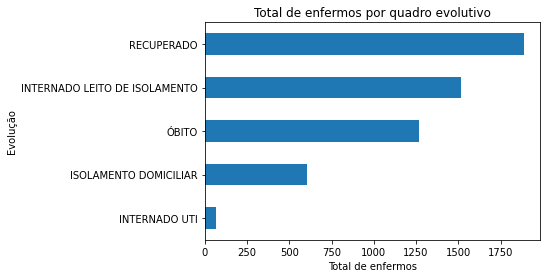

In [48]:
#Gráfico da quantidade de enfermos por evolução
df["evolucao"].value_counts(ascending=True).plot.barh(title="Total de enfermos por quadro evolutivo");
plt.ylabel("Evolução")
plt.xlabel("Total de enfermos");

In [49]:
#Enfermos por classificação final
df["classificacao_final"].value_counts(ascending=True)

EM ANÁLISE       253
INCONCLUSIVO     413
DESCARTADO      2041
CONFIRMADO      2793
Name: classificacao_final, dtype: int64

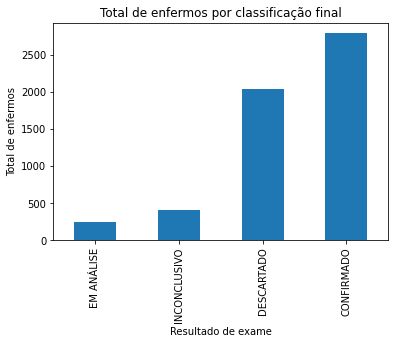

In [50]:
#Gráfico da quantidade de enfermos por classificação final
df["classificacao_final"].value_counts(ascending=True).plot.bar(title="Total de enfermos por classificação final");
plt.ylabel("Total de enfermos")
plt.xlabel("Resultado de exame");

In [51]:
#Óbitos por raça
df.groupby("raca")["data_obito"].count().sort_values(ascending=False)

raca
Parda       678
Branca      380
Ignorado     93
Preta        66
Amarela       6
Indígena      0
Name: data_obito, dtype: int64

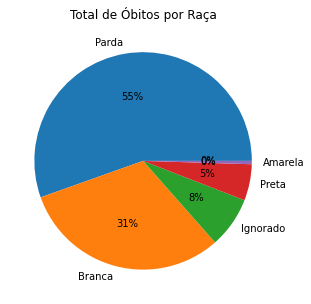

In [52]:
#Gráfico do total de óbitos por raça
df.groupby("raca")["data_obito"].count().sort_values(ascending=False).plot.pie(title="Total de Óbitos por Raça", figsize=(10,5), autopct='%1.0f%%')
plt.ylabel("");

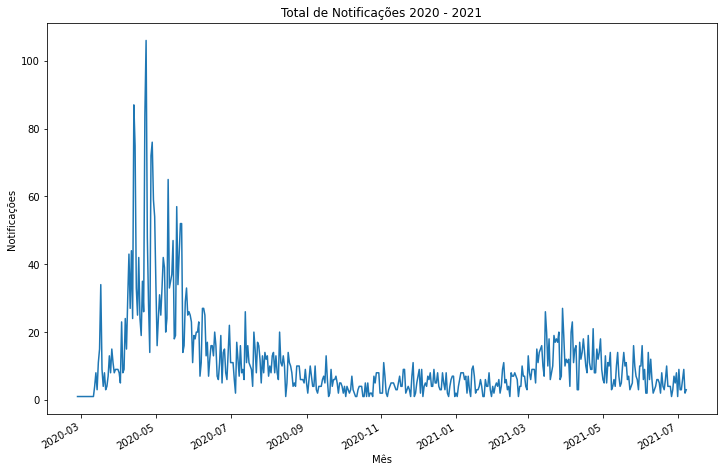

In [53]:
#Gráfico de notificações ano 2020 - 2021
df.groupby(df["data_notificacao"])["id"].count().plot(title="Total de Notificações 2020 - 2021",figsize=(12,8))
plt.ylabel("Notificações")
plt.xlabel("Mês");

In [54]:
#No ano de 2020
df_2020 = df[df.data_notificacao.dt.year == 2020]

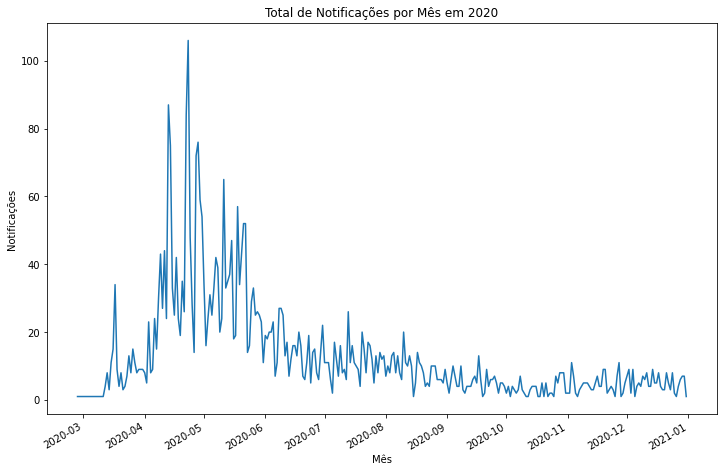

In [55]:
#Gráfico de notificações ano 2020
df_2020.groupby(df_2020.data_notificacao)["id"].count().plot(title="Total de Notificações por Mês em 2020",figsize=(12,8))
plt.ylabel("Notificações")
plt.xlabel("Mês");